In [1]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import tensorflow as tf
from joblib import dump, load
import time

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import classification_report, accuracy_score



# 读取数据，构造训练集和测试集

In [2]:
def load_data():
    # 读取数据
    x = np.load('train_data/train_data.npy')
    y = np.load('train_data/label.npy')
    num = len(Counter(y))
    print("类别数量为：", num)
    return x, y, num


In [3]:

def create_train_data(x, y, ratio=0.8):
    """
    x:数据
    y:类别
    ratio:生成训练集比率
    """
    # 打乱顺序
    # 读取data矩阵的第一维数（图片的个数）
    num_example = x.shape[0]
    # 产生一个num_example范围，步长为1的序列
    arr = np.arange(num_example)
    # 调用函数，打乱顺序
    np.random.seed(99)
    np.random.shuffle(arr)
    # 按照打乱的顺序，重新排序
    arr_data = x[arr]
    arr_label = y[arr]
    # 将数据集分为训练集80%、测试集20%
    s = int(num_example * ratio)
    x_train = arr_data[:s]
    y_train = arr_label[:s]
    x_val = arr_data[s:]
    y_val = arr_label[s:]
    print("训练集shape", x_train.shape)
    print("训练集类别：", Counter(y_train))
    print("测试集shape", x_val.shape)
    print("测试集类别：", Counter(y_val))
    return x_train, y_train, x_val, y_val


# 读取数据

In [4]:
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)
# # 从val_data和val_label中拿出最后1个元素作为测试组
# test_data = val_data[-1:]
# test_label = val_label[-1:]
# 
# # 移除val_data和val_label中的最后1个元素
# val_data = val_data[:-1]
# val_label = val_label[:-1]
print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))
# print("测试组数量：",len(test_label))

类别数量为： 4
训练集shape (3919, 1000, 2)
训练集类别： Counter({0: 989, 2: 987, 3: 979, 1: 964})
测试集shape (1681, 1000, 2)
测试集类别： Counter({1: 436, 3: 421, 2: 413, 0: 411})
**********
训练集数量： 3919
测试集数量： 1681



# 数据集构建

In [5]:
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0], val_data.shape[1] * val_data.shape[2])
# m_test = test_data.reshape(test_data.shape[0],test_data.shape[1]*test_data.shape[2])
# 设置训练迭代次数
epoch = 20


# 随机森林

In [6]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize

## 模型训练

In [7]:
# 模型参数设置

rfc = RandomForestClassifier(n_estimators = 50,min_samples_split = 5,min_samples_leaf = 4,max_depth = 5)

# 模型准确率和损失值
acc_list = []
# loss_list = []
train_acc_list = []
print("开始训练")
t1=time.time()
for i in range(1,epoch +1):

    # 模型训练
    rfc.fit(m_train,train_label)

    # # 训练集
    # y_train = rfc.predict(m_train)

    # 测试集
    y_pred = np.asarray(rfc.predict(m_val),dtype = 'int64')

    # 计算准确率
    acc = round(accuracy_score(val_label, y_pred),3)
    
    # 训练集
    y_pred = np.asarray(rfc.predict(m_train),dtype = 'int64')
    # 计算准确率
    train_acc = round(accuracy_score(train_label, y_pred),3)
    
    # print('测试集准确率:', round(accuracy_score(val_label, y_pred),3))
    acc_list.append(acc)
    train_acc_list.append(train_acc)
    
    # 计算损失值
    # 使用one-hot编码计算损失值
    # noe_hot = OneHotEncoder(sparse_output=False)
    # 
    # y_pred_o = noe_hot.fit_transform(y_pred.reshape(1, -1))
    # val_label_o = noe_hot.fit_transform(train_label.reshape(1, -1))
    
    # loss = round(log_loss(val_label_o,y_pred_o),3)
    # print("loss：",loss)
    # loss_list.append(loss)
    print("完成第",i,"轮训练，测试集准确率：",acc)
t2=time.time()
train_time=t2-t1
print('train_time:',train_time)

开始训练
完成第 1 轮训练，测试集准确率： 0.741
完成第 2 轮训练，测试集准确率： 0.739
完成第 3 轮训练，测试集准确率： 0.72
完成第 4 轮训练，测试集准确率： 0.736
完成第 5 轮训练，测试集准确率： 0.746
完成第 6 轮训练，测试集准确率： 0.729
完成第 7 轮训练，测试集准确率： 0.723
完成第 8 轮训练，测试集准确率： 0.742
完成第 9 轮训练，测试集准确率： 0.745
完成第 10 轮训练，测试集准确率： 0.736
完成第 11 轮训练，测试集准确率： 0.714
完成第 12 轮训练，测试集准确率： 0.725
完成第 13 轮训练，测试集准确率： 0.735
完成第 14 轮训练，测试集准确率： 0.732
完成第 15 轮训练，测试集准确率： 0.726
完成第 16 轮训练，测试集准确率： 0.75
完成第 17 轮训练，测试集准确率： 0.723
完成第 18 轮训练，测试集准确率： 0.736
完成第 19 轮训练，测试集准确率： 0.72
完成第 20 轮训练，测试集准确率： 0.719
train_time: 56.366109132766724


## 测试集得分

In [8]:
y_pred = np.asarray(rfc.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

result=classification_report(val_label, y_pred,output_dict=True)
rfc_info={}
rfc_info['accuracy']=result['accuracy']
rfc_info['precision']=result['macro avg']['precision']
rfc_info['recall']=result['macro avg']['recall']
rfc_info['f1-score']=result['macro avg']['f1-score']
rfc_info['train_time']=train_time

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.719
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       411
           1       0.71      0.76      0.73       436
           2       0.52      0.36      0.43       413
           3       0.75      0.75      0.75       421

    accuracy                           0.72      1681
   macro avg       0.70      0.72      0.70      1681
weighted avg       0.70      0.72      0.70      1681




## 模型迭代准确率

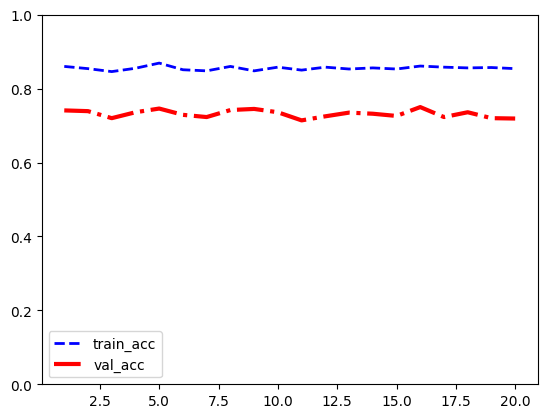

In [9]:
# 设置Y轴范围
plt.ylim(0, 1)
# 训练准确率曲线
show_data1 = train_acc_list
# 测试准确率曲线
show_data2 = acc_list
x_data = list(range(1, len(show_data1) + 1))
ln1, = plt.plot(x_data, show_data1, color='blue', linewidth=2.0, linestyle='--')
ln2, = plt.plot(x_data, show_data2, color='red', linewidth=3.0, linestyle='-.')
plt.legend(handles=[ln1, ln2], labels=['train_acc', 'val_acc'])
plt.show()

## 保存模型

In [10]:

# 保存模型
dump(rfc, 'models_save/rfc.joblib')
# # 加载
# rfc = load('models_save/rfc.joblib')
# print(rfc)

['models_save/rfc.joblib']

# SVM

In [11]:
from sklearn import svm  # 引入SVM库

# 读取数据

In [12]:
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0], val_data.shape[1] * val_data.shape[2])

类别数量为： 4
训练集shape (3919, 1000, 2)
训练集类别： Counter({0: 989, 2: 987, 3: 979, 1: 964})
测试集shape (1681, 1000, 2)
测试集类别： Counter({1: 436, 3: 421, 2: 413, 0: 411})
**********
训练集数量： 3919
测试集数量： 1681


In [13]:
# 模型参数设置
svm_model = svm.SVC(kernel='rbf',gamma='scale', probability=True)  # SVM模型的构建

# 模型准确率列表
acc_list = []
train_acc_list = []
print("开始训练")
t1=time.time()
# for i in range(1, epoch + 1):
# 模型训练
svm_model.fit(m_train, train_label)

# 测试集
y_pred = np.asarray(svm_model.predict(m_val), dtype='int64')

# 计算准确率
acc = round(accuracy_score(val_label, y_pred), 3)

# 训练集
y_pred_train = np.asarray(svm_model.predict(m_train), dtype='int64')
train_acc = round(accuracy_score(train_label, y_pred_train), 3)

acc_list.append(acc)
train_acc_list.append(train_acc)

print("完成SVM训练，测试集准确率：", acc)
t2=time.time()
train_time=t2-t1
print('train_time:',train_time)

开始训练
完成SVM训练，测试集准确率： 0.891
train_time: 101.69715142250061


In [14]:
y_pred_final = np.asarray(svm_model.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred_final), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred_final))

result=classification_report(val_label, y_pred,output_dict=True)
svm_info={}
svm_info['accuracy']=result['accuracy']
svm_info['precision']=result['macro avg']['precision']
svm_info['recall']=result['macro avg']['recall']
svm_info['f1-score']=result['macro avg']['f1-score']
svm_info['train_time']=train_time


------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.891
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.84      0.96      0.90       436
           2       0.88      0.77      0.82       413
           3       0.85      0.83      0.84       421

    accuracy                           0.89      1681
   macro avg       0.89      0.89      0.89      1681
weighted avg       0.89      0.89      0.89      1681



# 保存模型

In [15]:
dump(svm_model, 'models_save/svm.joblib')
# # 加载
# svm = load('models_save/svm.joblib')
# print(svm)

['models_save/svm.joblib']

# Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

# 读取数据

In [17]:
data, label, label_count = load_data()
# 生成训练集测试集，70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*"*10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))


类别数量为： 4
训练集shape (3919, 1000, 2)
训练集类别： Counter({0: 989, 2: 987, 3: 979, 1: 964})
测试集shape (1681, 1000, 2)
测试集类别： Counter({1: 436, 3: 421, 2: 413, 0: 411})
**********
训练集数量： 3919
测试集数量： 1681


In [18]:
# 模型参数设置
gnb_model = GaussianNB()  # Gaussian Naive Bayes 模型的构建

# 模型准确率列表
acc_list = []
train_acc_list = []
print("开始训练")
t1 = time.time()
# 模型训练
gnb_model.fit(m_train, train_label)

# 测试集
y_pred = np.asarray(gnb_model.predict(m_val), dtype='int64')

# 计算准确率
acc = round(accuracy_score(val_label, y_pred), 3)

# 训练集
y_pred_train = np.asarray(gnb_model.predict(m_train), dtype='int64')
train_acc = round(accuracy_score(train_label, y_pred_train), 3)

acc_list.append(acc)
train_acc_list.append(train_acc)

print("完成训练，测试集准确率：", acc)
t2 = time.time()
train_time = t2 - t1
print('train_time:', train_time)

开始训练
完成训练，测试集准确率： 0.52
train_time: 0.7640881538391113


In [19]:
y_pred_final = np.asarray(gnb_model.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred_final), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred_final))

result=classification_report(val_label, y_pred,output_dict=True)
gb_info={}
gb_info['accuracy']=result['accuracy']
gb_info['precision']=result['macro avg']['precision']
gb_info['recall']=result['macro avg']['recall']
gb_info['f1-score']=result['macro avg']['f1-score']
gb_info['train_time']=train_time

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.52
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.54      0.72      0.61       411
           1       0.57      0.82      0.68       436
           2       0.24      0.10      0.14       413
           3       0.54      0.43      0.48       421

    accuracy                           0.52      1681
   macro avg       0.47      0.52      0.48      1681
weighted avg       0.47      0.52      0.48      1681



# 保存模型

In [20]:
dump(gnb_model, 'models_save/gnb.joblib')

['models_save/gnb.joblib']

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier  

# 模型参数设置，选择KNN模型  

In [22]:
# 模型参数设置，选择KNN模型  
knn_model = KNeighborsClassifier(n_neighbors=5)  # 你可以根据需要调整邻居的数量  

# 模型准确率列表  
acc_list = []  
train_acc_list = []  
print("开始训练")  
t1=time.time()
# 模型拟合  
knn_model.fit(m_train, train_label)  

# 测试集  
y_pred = knn_model.predict(m_val)  

# 计算准确率  
acc = round(accuracy_score(val_label, y_pred), 3)  

# 训练集  
y_pred_train = knn_model.predict(m_train)  
train_acc = round(accuracy_score(train_label, y_pred_train), 3)  

acc_list.append(acc)  
train_acc_list.append(train_acc)  

print("完成训练，测试集准确率：", acc)  
t2=time.time()
train_time=t2-t1
print('train_time:',train_time)

开始训练
完成训练，测试集准确率： 0.727
train_time: 0.9636728763580322


In [23]:
print('------------------测试集上得分：------------------------')  
print('*' * 5)  
print('测试集准确率得分:', acc)  
print('*' * 5)  
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred,output_dict=False))  


result=classification_report(val_label, y_pred,output_dict=True)
knn_info={}
knn_info['accuracy']=result['accuracy']
knn_info['precision']=result['macro avg']['precision']
knn_info['recall']=result['macro avg']['recall']
knn_info['f1-score']=result['macro avg']['f1-score']
knn_info['train_time']=train_time


------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.727
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      0.25      0.39       436
           2       0.70      0.98      0.82       413
           3       0.51      0.72      0.60       421

    accuracy                           0.73      1681
   macro avg       0.80      0.73      0.70      1681
weighted avg       0.80      0.73      0.70      1681



In [24]:
# 保存模型
dump(knn_model, 'models_save/knn.joblib')

['models_save/knn.joblib']

# CNN

In [25]:
# Ensure you have the right device  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Reading data (implementation needed)  
data, label, label_count = load_data()
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))

Using device: cuda
类别数量为： 4
训练集shape (3919, 1000, 2)
训练集类别： Counter({0: 989, 2: 987, 3: 979, 1: 964})
测试集shape (1681, 1000, 2)
测试集类别： Counter({1: 436, 3: 421, 2: 413, 0: 411})
**********
训练集数量： 3919
测试集数量： 1681


# 数据集构建

In [26]:
# Create datasets and dataloaders  
train_dataset = TensorDataset(torch.tensor(train_data, dtype=torch.float32),
                              torch.tensor(train_label, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(val_data, dtype=torch.float32), torch.tensor(val_label, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


# 模型构建

In [27]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=2, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=16)
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)  # 全局平均池化  
        self.conv2 = nn.BatchNorm1d(64)
        self.fc1 = nn.Linear(64, 32)  # 输入是64（卷积层输出通道）  
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(32, 4)  # 输出为4类  

    def forward(self, x):
        x = self.conv1(x)  # 卷积层  
        x = self.conv2(x)
        x = torch.relu(x)  # 激活函数ReLU  
        x = self.pool(x)  # 池化层  
        x = self.global_avg_pool(x)  # 全局平均池化  
        x = x.view(x.size(0), -1)  # 展平  
        x = self.fc1(x)  # 全连接层  
        x = torch.relu(x)  # 激活函数ReLU  
        x = self.dropout(x)  # Dropout 层  
        x = self.fc2(x)  # 输出层  
        return x

        # Instantiate the model  


model = CNNModel().to(device)
print("实例化模型成功")
print("模型参数如下：")
print(model)

# Loss and optimizer  
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

实例化模型成功
模型参数如下：
CNNModel(
  (conv1): Conv1d(2, 64, kernel_size=(3,), stride=(1,))
  (pool): MaxPool1d(kernel_size=16, stride=16, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveAvgPool1d(output_size=1)
  (conv2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=32, out_features=4, bias=True)
)


# 训练模型

In [28]:
# Training loop  
epochs = 20
t1 = time.time()
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs.permute(0, 2, 1))  # Adjust dimensions for Conv1D  
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')
t2 = time.time()
train_time = t2 - t1
print(f'Training time: {t2 - t1:.2f} seconds')

Epoch [1/20], Loss: 0.9255
Epoch [2/20], Loss: 0.5923
Epoch [3/20], Loss: 0.4836
Epoch [4/20], Loss: 0.4054
Epoch [5/20], Loss: 0.3058
Epoch [6/20], Loss: 0.2451
Epoch [7/20], Loss: 0.2003
Epoch [8/20], Loss: 0.1658
Epoch [9/20], Loss: 0.1475
Epoch [10/20], Loss: 0.1242
Epoch [11/20], Loss: 0.1099
Epoch [12/20], Loss: 0.1065
Epoch [13/20], Loss: 0.0950
Epoch [14/20], Loss: 0.0790
Epoch [15/20], Loss: 0.0795
Epoch [16/20], Loss: 0.0661
Epoch [17/20], Loss: 0.0775
Epoch [18/20], Loss: 0.0776
Epoch [19/20], Loss: 0.0616
Epoch [20/20], Loss: 0.0632
Training time: 34.06 seconds


# Evaluation

In [29]:
# Evaluation  
model.eval()
with torch.no_grad():
    val_outputs = []
    val_labels = []
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs.permute(0, 2, 1))
        val_outputs.append(outputs.cpu().numpy())
        val_labels.append(labels.cpu().numpy())

    # Convert outputs and labels to numpy arrays  
val_outputs = np.vstack(val_outputs)
print(val_outputs.shape)
print(val_outputs[:10])
val_labels = np.concatenate(val_labels)
print(val_labels[:10])
y_pred = np.argmax(val_outputs, axis=1)

print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_labels, y_pred), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_labels, y_pred))  

result=classification_report(val_labels, y_pred,output_dict=True)
cnn_info={}
cnn_info['accuracy']=result['accuracy']
cnn_info['precision']=result['macro avg']['precision']
cnn_info['recall']=result['macro avg']['recall']
cnn_info['f1-score']=result['macro avg']['f1-score']
cnn_info['train_time']=train_time

(1681, 4)
[[-16.324635    -0.10668054   5.42915     -4.0986624 ]
 [-15.890556    -1.4036868    7.5988994   -8.858969  ]
 [-11.860165    -3.660379     4.1254787   -0.58002615]
 [-13.351722    -4.7545724   -0.6790837    7.110614  ]
 [  8.736557    -1.4780585   -4.8953285   -5.8453264 ]
 [-14.709231    -3.4050255   -0.850225     6.8032494 ]
 [ -9.775333     7.0154166   -1.3502665   -9.132056  ]
 [ -9.3766365    5.982654     0.57324123 -10.594754  ]
 [  8.73301     -2.8769732   -6.865297    -1.3734845 ]
 [ -8.047127     5.816885     1.650919   -11.661444  ]]
[2 2 2 3 0 3 1 1 0 1]
------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.999
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       436
           2       1.00      1.00      1.00       413
           3       1.00      1.00      1.00       421

    accuracy                           1.00   

# 保存模型

In [30]:
# 保存模型
model_path = 'models_save/CNNmodel.h5'
torch.save(CNNModel, model_path)
print("完成模型训练，保存地址：", model_path)

完成模型训练，保存地址： models_save/CNNmodel.h5


# CNN+ResNet

# 模型构建

In [31]:
import torch.nn.functional as F  

class ResidualBlock(nn.Module):  
    def __init__(self, filters, conv_size):  
        super(ResidualBlock, self).__init__()  
        self.conv1 = nn.Conv1d(filters, filters, conv_size, padding='same')  
        self.bn1 = nn.BatchNorm1d(filters)  
        self.conv2 = nn.Conv1d(filters, filters, conv_size, padding='same')  
        self.bn2 = nn.BatchNorm1d(filters)  

    def forward(self, x):  
        identity = x  
        out = self.conv1(x)  
        out = F.relu(self.bn1(out))  
        out = self.conv2(out)  
        out = self.bn2(out)  
        out += identity  
        out = F.relu(out)  
        return out  

class CNN_ResNet_model(nn.Module):  
    def __init__(self, label_num, num_b, data_shape=(1000, 2)):  
        super(CNN_ResNet_model, self).__init__()  
        self.num_blocks = num_b  
        self.filters = 64  
        self.conv_size = 3  
        self.label_num = label_num  

        # Initial Conv Layers  
        self.conv1 = nn.Conv1d(data_shape[1], 32, 3)  
        self.conv2 = nn.Conv1d(32, 64, 3)  

        # Pooling Layer  
        self.pool = nn.MaxPool1d(16)  

        # ResNet Blocks  
        self.res_blocks = nn.ModuleList([ResidualBlock(self.filters, self.conv_size) for _ in range(self.num_blocks)])  

        # Additional Conv Layer after ResNet Blocks  
        self.conv3 = nn.Conv1d(64, 64, 3)  

        # Global Average Pooling  
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)  

        # Fully connected layers  
        self.fc1 = nn.Linear(64, 256)  
        self.dropout = nn.Dropout(0.5)  
        self.fc2 = nn.Linear(256, label_num)  

    def forward(self, x):  
        x = F.relu(self.conv1(x))  
        x = F.relu(self.conv2(x))  
        x = self.pool(x)  

        for block in self.res_blocks:  
            x = block(x)  

        x = F.relu(self.conv3(x))  
        x = self.global_avg_pool(x)  
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layer  
        x = F.relu(self.fc1(x))  
        x = self.dropout(x)  
        x = self.fc2(x)  
        x = F.log_softmax(x, dim=1)  

        return x  

In [33]:
# 模型参数
model_param = {
    "a_shape": 1000,
    "b_shape": 2,
    "label_count": 4,
    "num_b":5
}

data_shape=(model_param['a_shape'],model_param['b_shape'])
# 模型实例化
model = CNN_ResNet_model(model_param['label_count'] , model_param['num_b'] , data_shape=data_shape)
# 使用学习率进行训练
# 模型网络结构
print("实例化模型成功，网络结构如下：")
print(model)  



实例化模型成功，网络结构如下：
CNN_ResNet_model(
  (conv1): Conv1d(2, 32, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (pool): MaxPool1d(kernel_size=16, stride=16, padding=0, dilation=1, ceil_mode=False)
  (res_blocks): ModuleList(
    (0): ResidualBlock(
      (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=same)
      (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=same)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=same)
      (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=same)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2

# 损失函数和优化器

In [34]:
from torch.utils.data import DataLoader, Dataset
# train_data 和 val_data 需要转换为 PyTorch 能够读取的 Dataset 类，并调整数据的形状  

def preprocess_data(data, target_shape):  
    data = np.array(data)  
    # target_shape=(sequence_length, channels)  
    data = data.reshape(data.shape[0], target_shape[1], target_shape[0])  # 更改数据形状  
    return data  

model_param = {  
    "a_shape": 1000,  
    "b_shape": 2,  
    "label_count": 4,  
    "num_b": 5  
}  

train_data_processed = preprocess_data(train_data, (model_param['a_shape'], model_param['b_shape']))  
val_data_processed = preprocess_data(val_data, (model_param['a_shape'], model_param['b_shape']))  

class CustomDataset(Dataset):  
    def __init__(self, data, labels):  
        self.data = torch.tensor(data, dtype=torch.float32)  # Convert to tensor  
        self.labels = torch.tensor(labels, dtype=torch.long)  # Convert to tensor  

    def __len__(self):  
        return len(self.data)  

    def __getitem__(self, idx):  
        return self.data[idx], self.labels[idx]  

train_dataset = CustomDataset(train_data_processed, train_label)  
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  

val_dataset = CustomDataset(val_data_processed, val_label)  
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)  

data_shape = (model_param['a_shape'], model_param['b_shape'])  # (sequence_length, channels)  
model = CNN_ResNet_model(model_param['label_count'], model_param['num_b'], data_shape=data_shape)  

# 定义损失函数和优化器  
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=1e-4)  

# 设置日志输出地址  
log_dir = os.path.join("logs", "ResNet")  
if not os.path.exists(log_dir):  
    os.makedirs(log_dir)  

# 训练模型

In [35]:

num_epochs = 20  
train_accuracies = []  
val_accuracies = []  

t1 = time.time()
model.train()  

for epoch in range(num_epochs):  
    running_loss = 0.0  
    correct_predictions = 0  
    model.train()  
    
    for inputs, labels in train_loader:  
        optimizer.zero_grad()  
        outputs = model(inputs)   
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step()  

        running_loss += loss.item() * inputs.size(0)  
        _, preds = torch.max(outputs, 1)  
        correct_predictions += torch.sum(preds == labels.data)  
        
    epoch_loss = running_loss / len(train_loader.dataset)  
    epoch_acc = correct_predictions.double() / len(train_loader.dataset)  
    train_accuracies.append(epoch_acc.item())  # 记录训练准确率  

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")  
    
    # 评估模型在验证集上的表现  
    model.eval()  
    correct_predictions = 0  

    with torch.no_grad():  
        for inputs, labels in val_loader:  
            outputs = model(inputs)  
            _, preds = torch.max(outputs, 1)  
            correct_predictions += torch.sum(preds == labels.data)  
            
    epoch_val_acc = correct_predictions.double() / len(val_loader.dataset)  
    val_accuracies.append(epoch_val_acc.item())  # 记录验证准确率  
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Validation Accuracy: {epoch_val_acc:.4f}")  

print("Training completed.")  
t2=time.time()
train_time=t2-t1

Epoch [1/20], Loss: 0.7911, Train Accuracy: 0.7004
Epoch [1/20], Validation Accuracy: 0.6568
Epoch [2/20], Loss: 0.1924, Train Accuracy: 0.9380
Epoch [2/20], Validation Accuracy: 0.9030
Epoch [3/20], Loss: 0.1042, Train Accuracy: 0.9650
Epoch [3/20], Validation Accuracy: 0.8662
Epoch [4/20], Loss: 0.0677, Train Accuracy: 0.9770
Epoch [4/20], Validation Accuracy: 0.9286
Epoch [5/20], Loss: 0.0484, Train Accuracy: 0.9857
Epoch [5/20], Validation Accuracy: 0.9578
Epoch [6/20], Loss: 0.0421, Train Accuracy: 0.9865
Epoch [6/20], Validation Accuracy: 0.7894
Epoch [7/20], Loss: 0.0383, Train Accuracy: 0.9872
Epoch [7/20], Validation Accuracy: 0.9709
Epoch [8/20], Loss: 0.0216, Train Accuracy: 0.9941
Epoch [8/20], Validation Accuracy: 0.8959
Epoch [9/20], Loss: 0.0174, Train Accuracy: 0.9936
Epoch [9/20], Validation Accuracy: 0.9447
Epoch [10/20], Loss: 0.0218, Train Accuracy: 0.9923
Epoch [10/20], Validation Accuracy: 0.7597
Epoch [11/20], Loss: 0.0208, Train Accuracy: 0.9926
Epoch [11/20], V

In [36]:
# 评估模型  
model.eval()  
all_labels = []  
all_predictions = []  

with torch.no_grad():  
    for inputs, labels in val_loader:  
        outputs = model(inputs)  
        _, preds = torch.max(outputs, 1)  
        all_labels.extend(labels.cpu().numpy())  
        all_predictions.extend(preds.cpu().numpy())  

# 计算各项指标  
print("*****完成预处理，进行模型评估*****")  
print('------------------测试集上得分：------------------------')  

y_pred = all_predictions  
val_labels = val_label  # Assuming val_label is already available  

print('*' * 5)  
print('测试集准确率得分:', round(accuracy_score(val_labels, y_pred), 3))  
print('*' * 5)  
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_labels, y_pred))  

*****完成预处理，进行模型评估*****
------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.998
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       436
           2       1.00      0.99      1.00       413
           3       1.00      1.00      1.00       421

    accuracy                           1.00      1681
   macro avg       1.00      1.00      1.00      1681
weighted avg       1.00      1.00      1.00      1681



In [37]:
result=classification_report(val_labels, y_pred,output_dict=True)
CNN_resnet_info={}
CNN_resnet_info['accuracy']=result['accuracy']
CNN_resnet_info['precision']=result['macro avg']['precision']
CNN_resnet_info['recall']=result['macro avg']['recall']
CNN_resnet_info['f1-score']=result['macro avg']['f1-score']
CNN_resnet_info['train_time']=train_time

In [38]:
# 保存模型
model_path = 'models_save/CNN_ResNet_model.h5'
torch.save(model, model_path)
print("完成模型训练，保存地址：", model_path)


完成模型训练，保存地址： models_save/CNN_ResNet_model.h5


## 模型迭代准确率

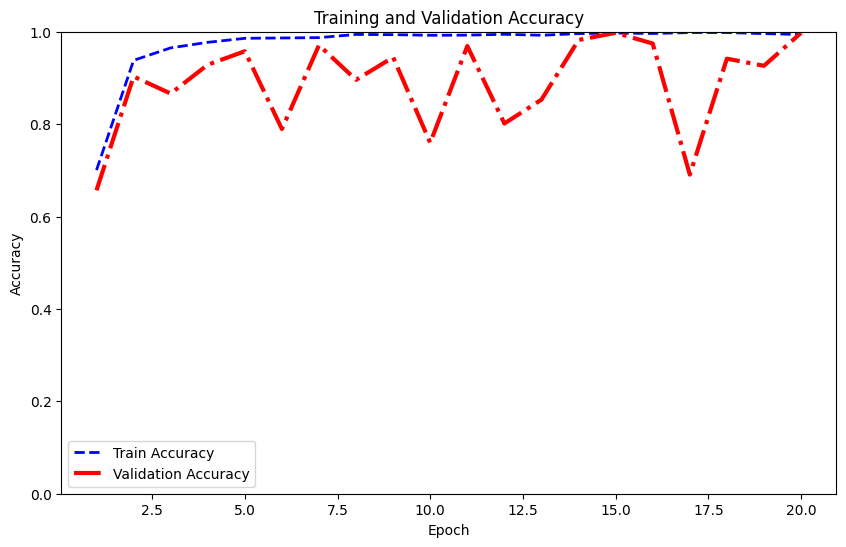

In [39]:
import matplotlib.pyplot as plt
# 绘制训练和验证准确率随 epoch 变化的图  
plt.figure(figsize=(10, 6))  

# 设置 Y 轴范围  
plt.ylim(0, 1)  

# 绘制训练准确率曲线  
plt.plot(range(1, num_epochs + 1), train_accuracies, color='blue', linewidth=2.0, linestyle='--', label='Train Accuracy')  

# 绘制验证准确率曲线  
plt.plot(range(1, num_epochs + 1), val_accuracies, color='red', linewidth=3.0, linestyle='-.', label='Validation Accuracy')  

# 设置图例  
plt.legend()  

# 设置图形标题和轴标签  
plt.title('Training and Validation Accuracy')  
plt.xlabel('Epoch')  
plt.ylabel('Accuracy')  

# 显示图形  
plt.show()  

# 对比模型

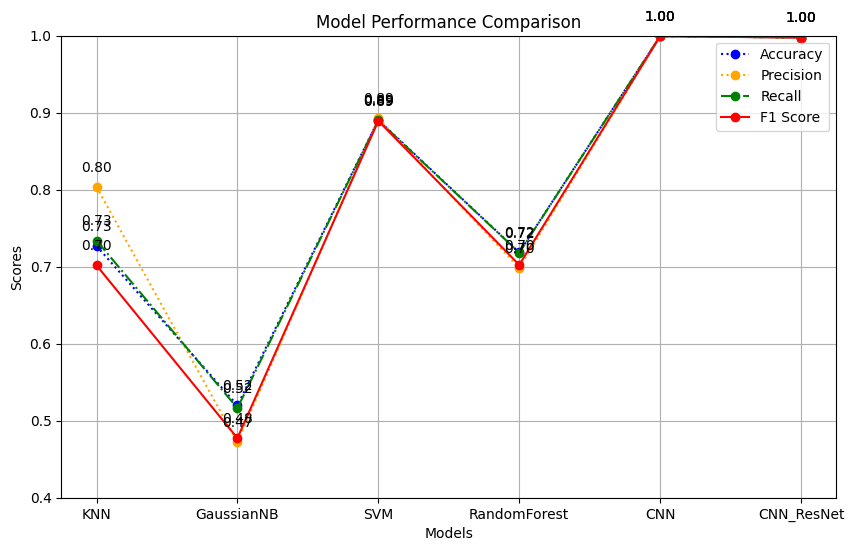

In [40]:
results = {'KNN':knn_info,'GaussianNB':gb_info,'SVM':svm_info,'RandomForest':rfc_info,'CNN':cnn_info,'CNN_ResNet':CNN_resnet_info}

model_names = list(results.keys())  
accuracy = [results[model]['accuracy'] for model in model_names]  
precision = [results[model]['precision'] for model in model_names]  
recall = [results[model]['recall'] for model in model_names]  
f1_score = [results[model]['f1-score'] for model in model_names]  
# train_time=[results[model]['train_time'] for model in model_names]
# 设置 X 轴位置  
x = np.arange(len(model_names))  

# 设置宽度  
width = 0.2  

# 创建图形和轴  
plt.figure(figsize=(10, 6))  

# 绘制折线图  
plt.plot(model_names, accuracy, marker='o', label='Accuracy', linestyle='dotted', color='blue')  
plt.plot(model_names, precision, marker='o', label='Precision', linestyle=':', color='orange')  
plt.plot(model_names, recall, marker='o', label='Recall', linestyle='-.', color='green')  
plt.plot(model_names, f1_score, marker='o', label='F1 Score', linestyle='-', color='red')  
# plt.plot(model_names, train_time, marker='o', label='Train Time', linestyle='--', color='purple')

# 添加标题和标签  
plt.title('Model Performance Comparison')  
plt.xlabel('Models')  
plt.ylabel('Scores')  
plt.ylim(0.40, 1)  

# 图例  
plt.legend()  

# 显示数值标签  
for i, (acc, prec, rec, f1) in enumerate(zip(accuracy, precision, recall, f1_score)):  
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center')  
    plt.text(i, prec + 0.02, f'{prec:.2f}', ha='center')  
    plt.text(i, rec + 0.02, f'{rec:.2f}', ha='center')  
    plt.text(i, f1 + 0.02, f'{f1:.2f}', ha='center')  
    # plt.text(i, train_time[i] + 0.02, f'{train_time[i]:.2f}', ha='center')


# 显示图形  
 
plt.grid()  
plt.show()  

# 比较训练时间

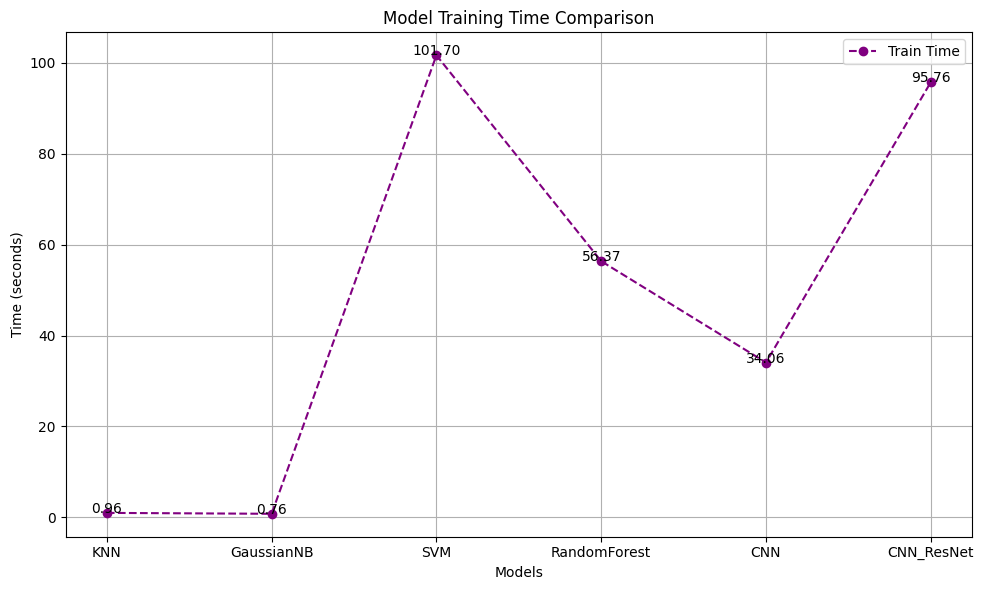

In [41]:
train_time=[results[model]['train_time'] for model in model_names]
# 创建图形和轴
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_time, marker='o', label='Train Time', linestyle='--', color='purple')
# 添加标题和标签
plt.title('Model Training Time Comparison')
plt.xlabel('Models')
plt.ylabel('Time (seconds)')
# 图例
plt.legend()
# 显示数值标签
for i, ttime in enumerate(train_time):
    plt.text(i, ttime , f'{ttime:.2f}', ha='center')
# 显示图形
plt.tight_layout()
plt.grid()
plt.show()
